# Lecture 5: PCA

### 1. Principal Component Analysis (PCA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

%matplotlib inline

In [ ]:
USArrests = pd.read_csv('USArrests.csv', index_col=0)
USArrests.head()

In [ ]:
# pandas has a built-in function to get the mean and variance of each column
print(USArrests.mean())
print(USArrests.var())



In [ ]:
# We can rescale the data 
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(USArrests), index=USArrests.index, columns=USArrests.columns)
# The loading vectors (i.e. these are the projection of the data onto the principal components)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=USArrests.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

""" 
Depends on the version of python/module, you may see a flipped loading vector in signs. 
This is normal because the orientation of the principal components is not deterministic. 
"""
# X1=pd.DataFrame(sc.inverse_transform(X), index=USArrests.index, columns=USArrests.columns)

In [ ]:
# fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

In [ ]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3])
plt.show()

### Image Compression
Load image with OpenCV. 

If OPenCV not install, try 
*pip install opencv-python* in terminal.

In [ ]:
import cv2
import matplotlib.pyplot as plt

A = cv2.imread('png_github_64039.png')

plt.imshow(A)

Check the size of the image.

In [ ]:
print(A.shape)

We can have up to 1600 components in this image.

There is 3 color channels in the loaded image, Red Blue Green, although it looks like just balck and white. 

Take a mean on the color channel direction to make it a grayscale image.

In [ ]:
from numpy import mean
A1 = mean(A,2)

Check the quality of reconstruction number differnt numbers of principal components.

In [ ]:
from sklearn import decomposition
import matplotlib.ticker as tic

components = range(1,13) #range(1,60,10)
fig=plt.figure()
for i, num_pc in enumerate(components):
    i+=1
    
    # Set the number of qulity being used
    pca = decomposition.PCA(n_components=num_pc)
    pca.fit(A1)
    
    # The reconstruction is done with the inverse_transform method.
    Rec = pca.inverse_transform(pca.transform(A1))
    
    # Make subplot
    ax = fig.add_subplot(3,4,i,frame_on=False)
    
    # Removing ticks
    ax.xaxis.set_major_locator(tic.NullLocator())
    ax.yaxis.set_major_locator(tic.NullLocator())
    
    plt.imshow(Rec)
    plt.title(str(num_pc) + ' PCs')
    plt.gray()


Variance ratio vs the number of principal components

In [ ]:
pca1 = decomposition.PCA(n_components=50)
pca1.fit(A1)
var_ratio = pca1.explained_variance_ratio_

plt.plot(range(0,50),var_ratio)
plt.show()

### 2. Singular Value Decomposition (SVD)

The letter J has four components.

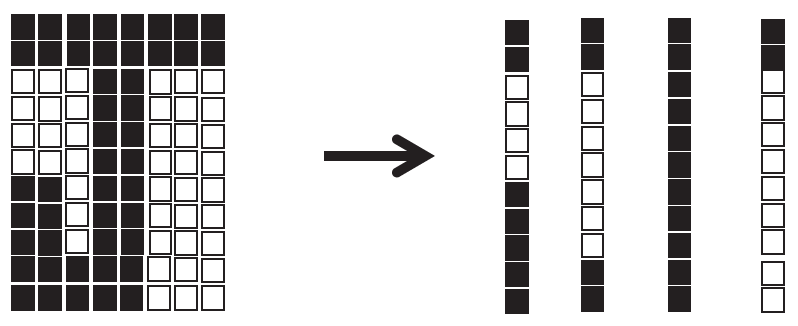

Let's create a noisy J for testing.

Started with a clear J.

In [ ]:
import numpy as np

M = np.ones((250,150))
M[:31,:]=0
M[:,60:91]=0
M[-31:,:60]=0
M[150:,:31]=0

plt.imshow(M)

Add some noise.

In [ ]:
M_noisy = np.asmatrix(np.random.uniform(low=0,\
high=0.7, size=(250,150)))
M_noisy = M + M_noisy

plt.imshow(M_noisy)

Compute the full SVD
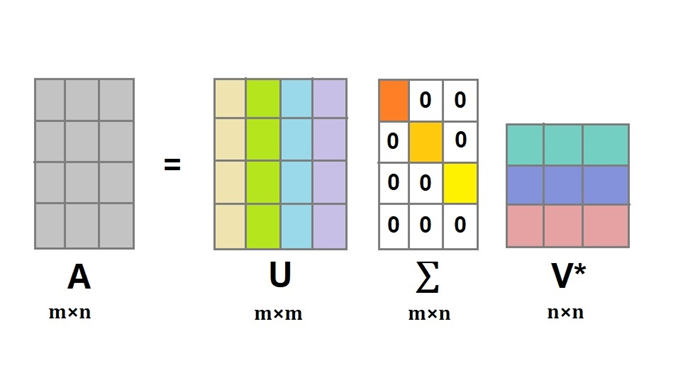

In [ ]:
U, s, V = np.linalg.svd(M_noisy)

Use Truncated SVD to cover J.

Let's check the results under different ranks.

In [ ]:
fig=plt.figure()
for K in range(1,5):
    Sig = np.mat(np.eye(K)*s[:K])
    
    U_reduced = U[:,:K]
    V_reduced = V[:K,:]
    
    # We get rid of the columns we do not need.
    M_rec = U_reduced*Sig*V_reduced
    
    # Make subplot
    ax = fig.add_subplot(1,4,K,frame_on=False)
    
    # Removing ticks
    ax.xaxis.set_major_locator(tic.NullLocator())
    ax.yaxis.set_major_locator(tic.NullLocator())
    
    plt.imshow(M_rec)
    plt.title('Rank K =' + str(K))
    plt.gray()

In [ ]:
plt.plot(s[:10],range(10))

It seems like $K=40$ is a better choice, but is it?

In [ ]:
K = 40

Sig = np.mat(np.eye(K)*s[:K])
    
U_reduced = U[:,:K]
V_reduced = V[:K,:]
    
# We get rid of the columns we do not need.
M_rec = U_reduced*Sig*V_reduced
    
    
plt.imshow(M_rec)
plt.title('Rank K =' + str(K))
plt.gray()